# Data Exploration and Preprocessing

In [2]:
pip install ppscore

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 10.4 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for ppscore: filename=ppscore-1.3.0-py2.py3-none-any.whl size=13166 sha256=1a1b565d7c689113857c3f20a37e3fc550a84fb14c7a2b08b8d37b8abf0203e7
  Stored in directory: /Users/utkarshhajare/Library/Caches/pip/wheels/30/1c/06/b724ffb08ed69cd209743b44137306245ebbf025fd9acacf0c
  Created wheel for pandas: filename=pandas-1.5.3-cp312-cp312-macosx_11_0_arm64.whl size=10141752 sha256=1611e7ac404fcbeab6f5243d397d52042da5364ea5a599949e6e2d1392f62ccf
  Stored in directory: /Users/utkarshhajare/Library/Caches/pip/wheels/fb/83/18/8e7307aa1185c5498c5490e4d9c8a1732d9f1056e86c3491c6
Successfully built ppscore pandas
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Su

In [67]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.ensemble import IsolationForest
import ppscore as pps
from sklearn.feature_selection import SelectKBest, chi2, RFE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [2]:
adults = pd.read_csv("/Users/utkarshhajare/DS material/Assignements/EDA2/adult_with_headers.csv")

In [4]:
adults

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
adults.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [5]:
adults.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [10]:
adults.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


**Replace '?' with NaN**

In [6]:
adults.replace(' ?', np.nan, inplace=True)

**Impute categorical missing values with mode**

In [8]:
for col in adults.select_dtypes(include='object'):
    adults[col].fillna(adults[col].mode()[0], inplace=True)

**Visualization of numeric columns**

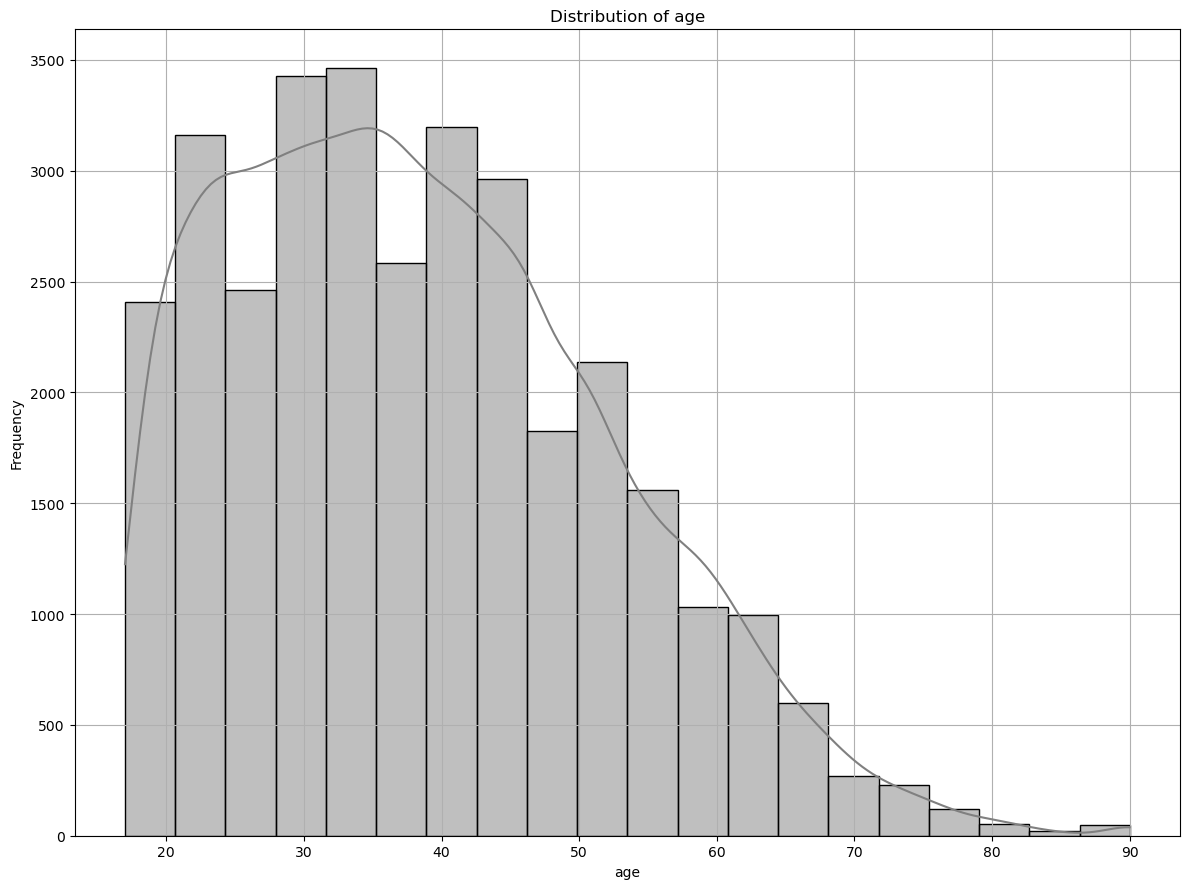

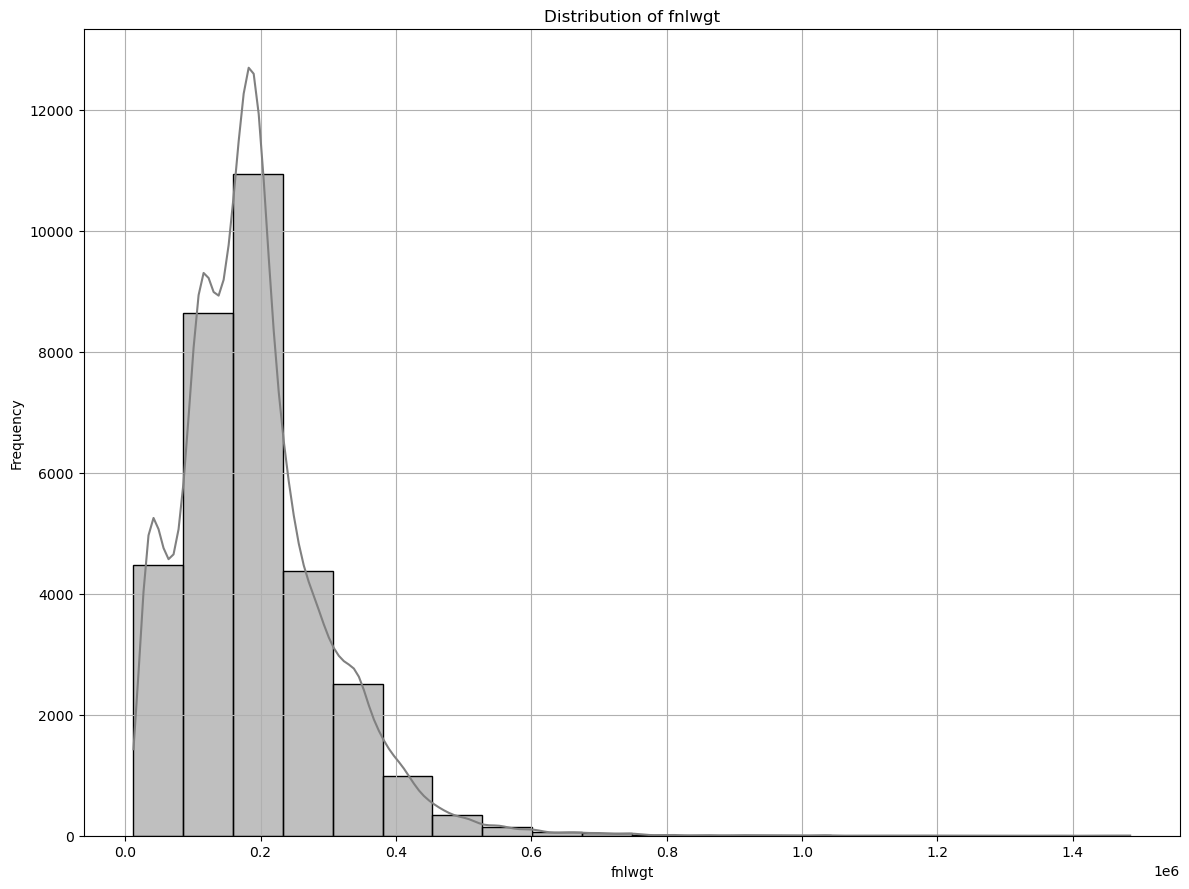

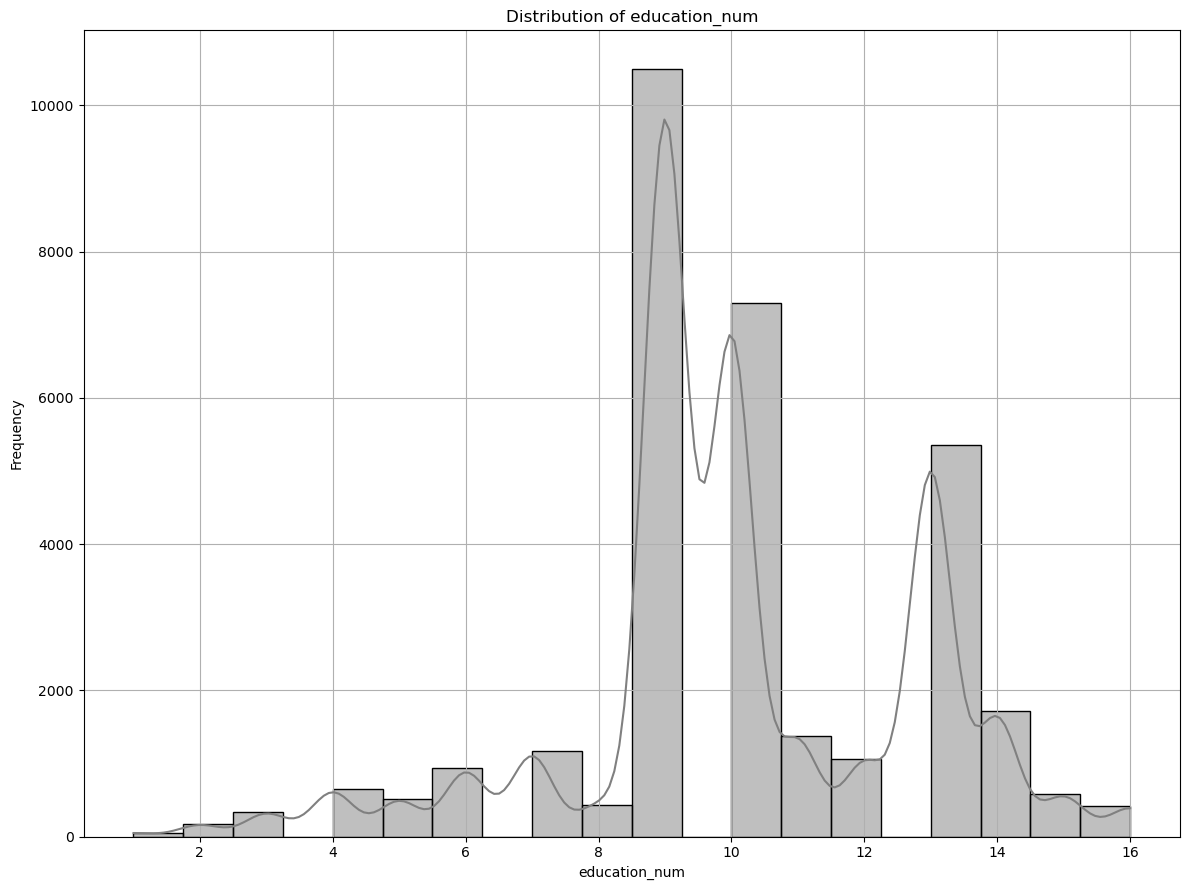

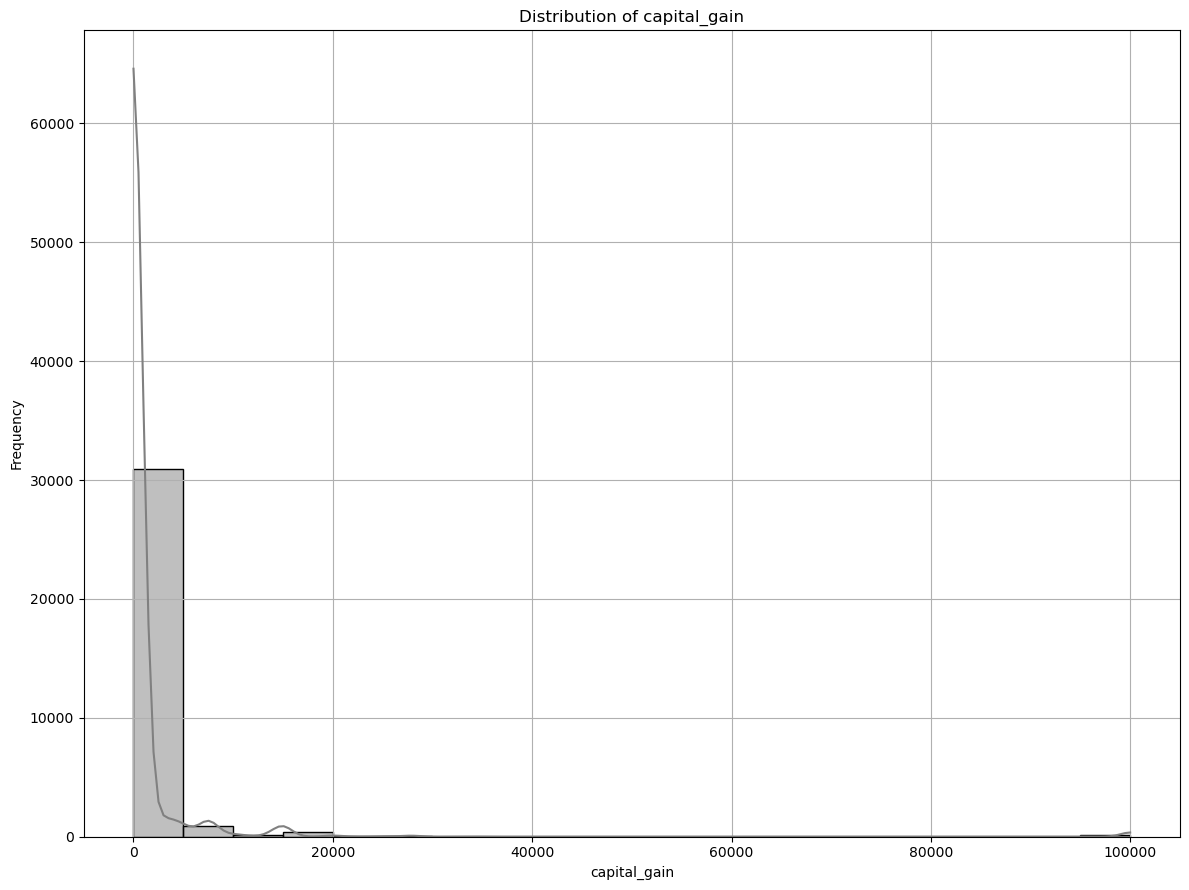

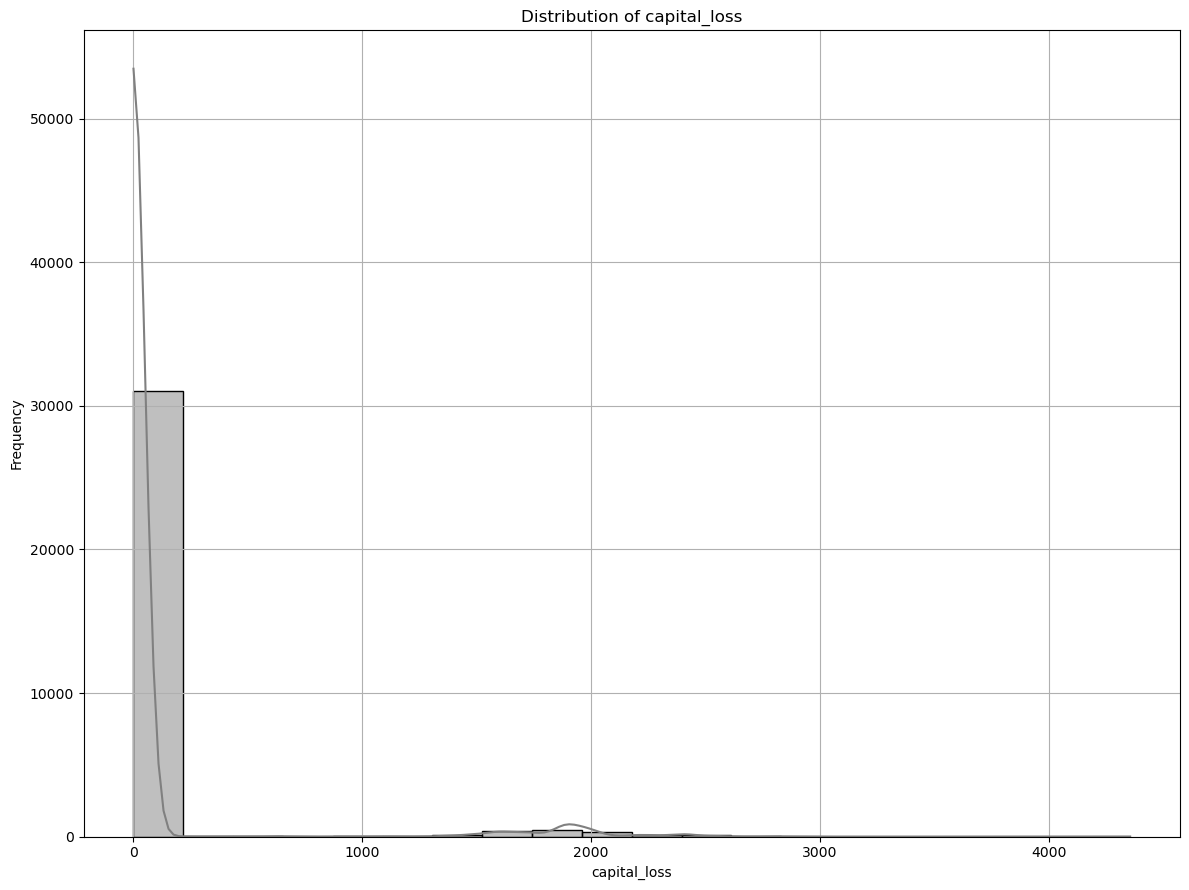

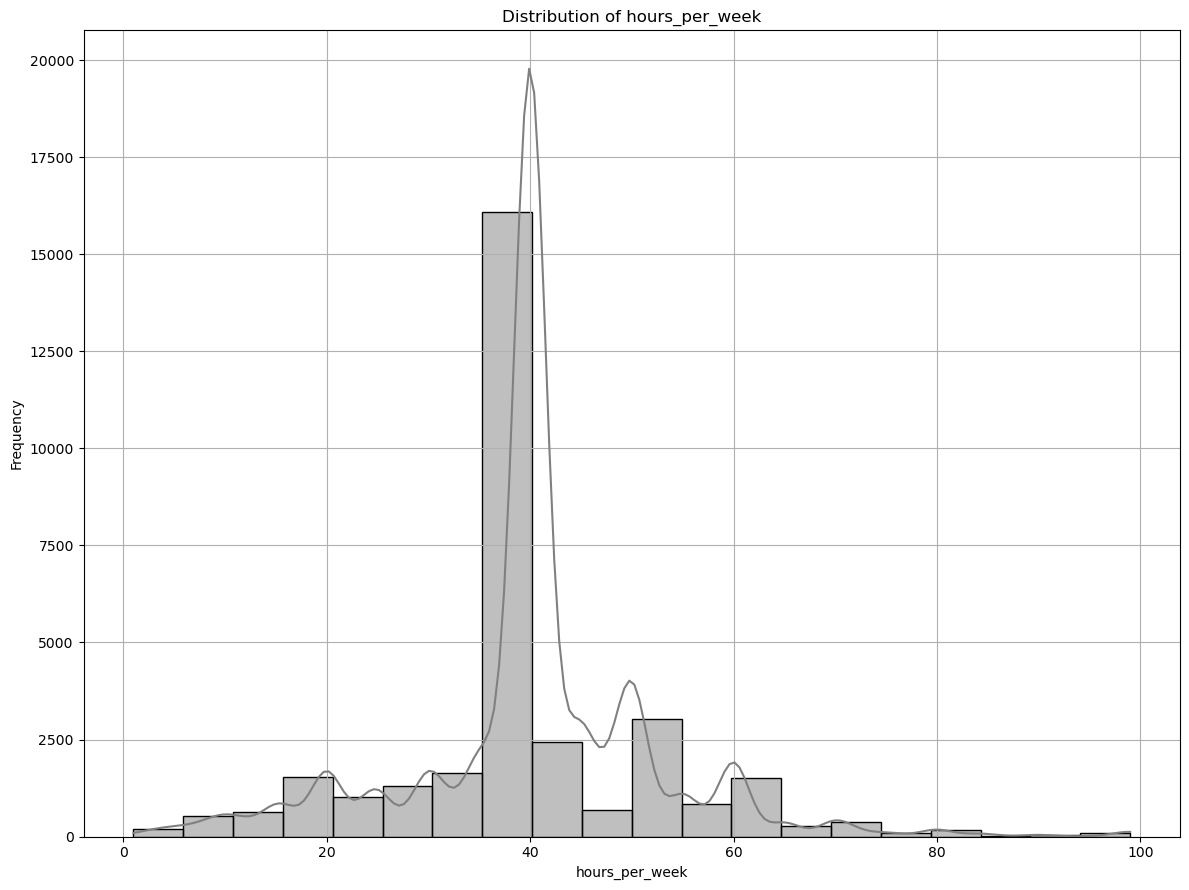

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in adults.select_dtypes(include=['number']):
    plt.figure(figsize=(12, 9))
    sns.histplot(data=adults, x=col, bins=20, kde=True, color='grey', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

**Visualization of objective columns**

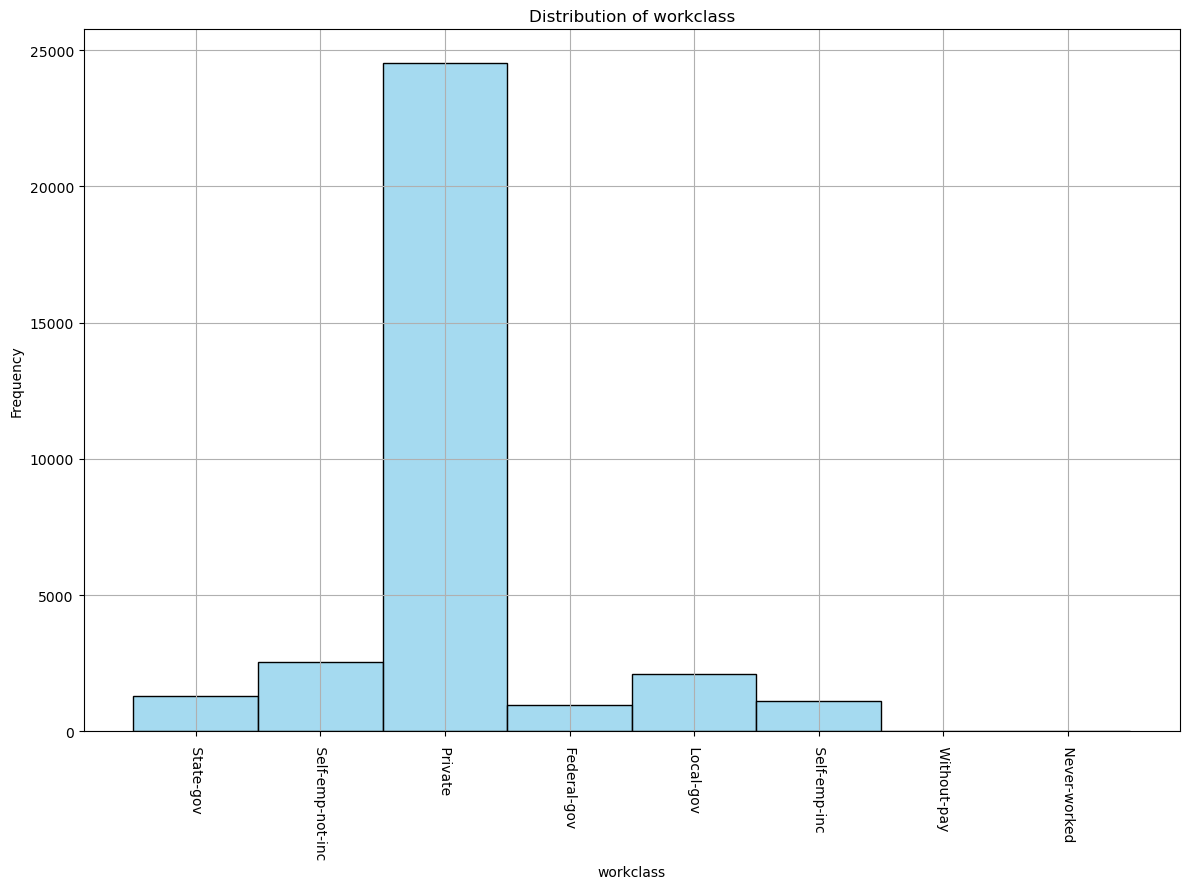

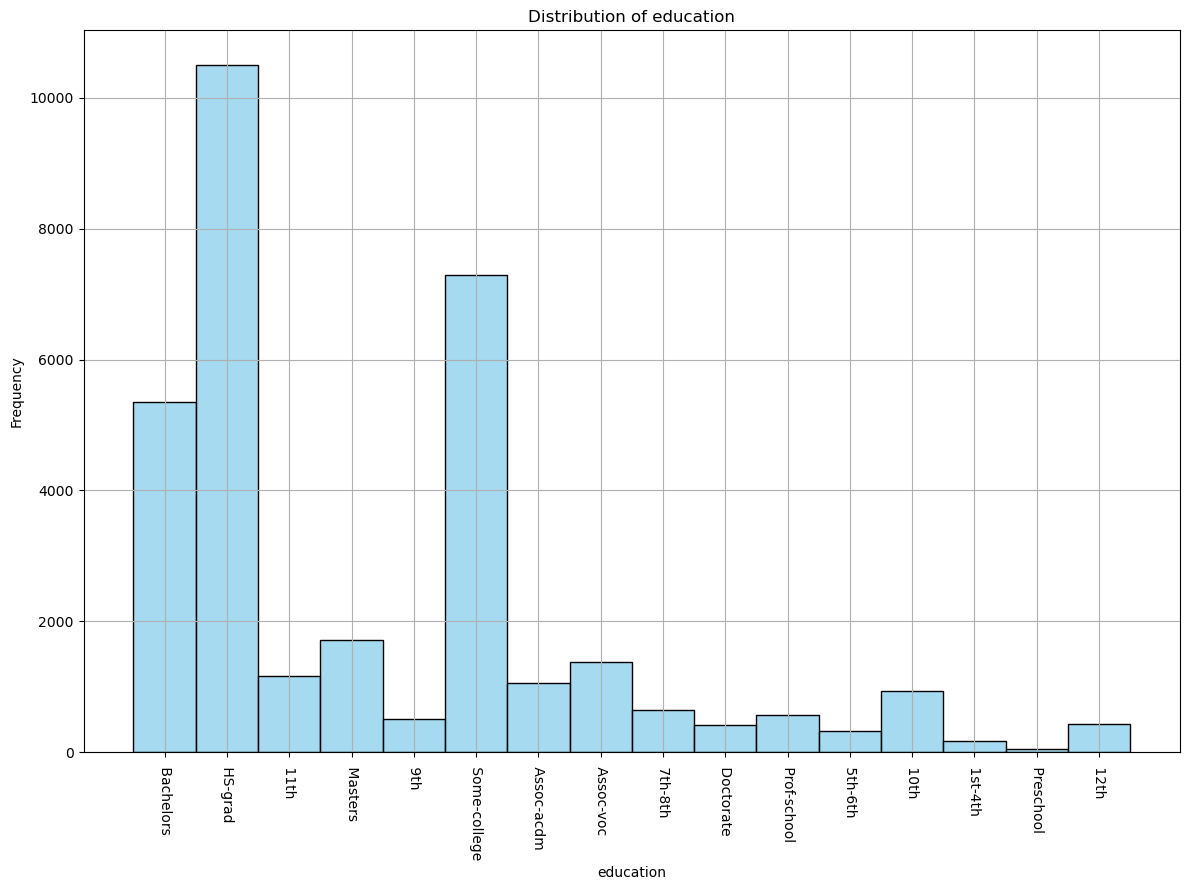

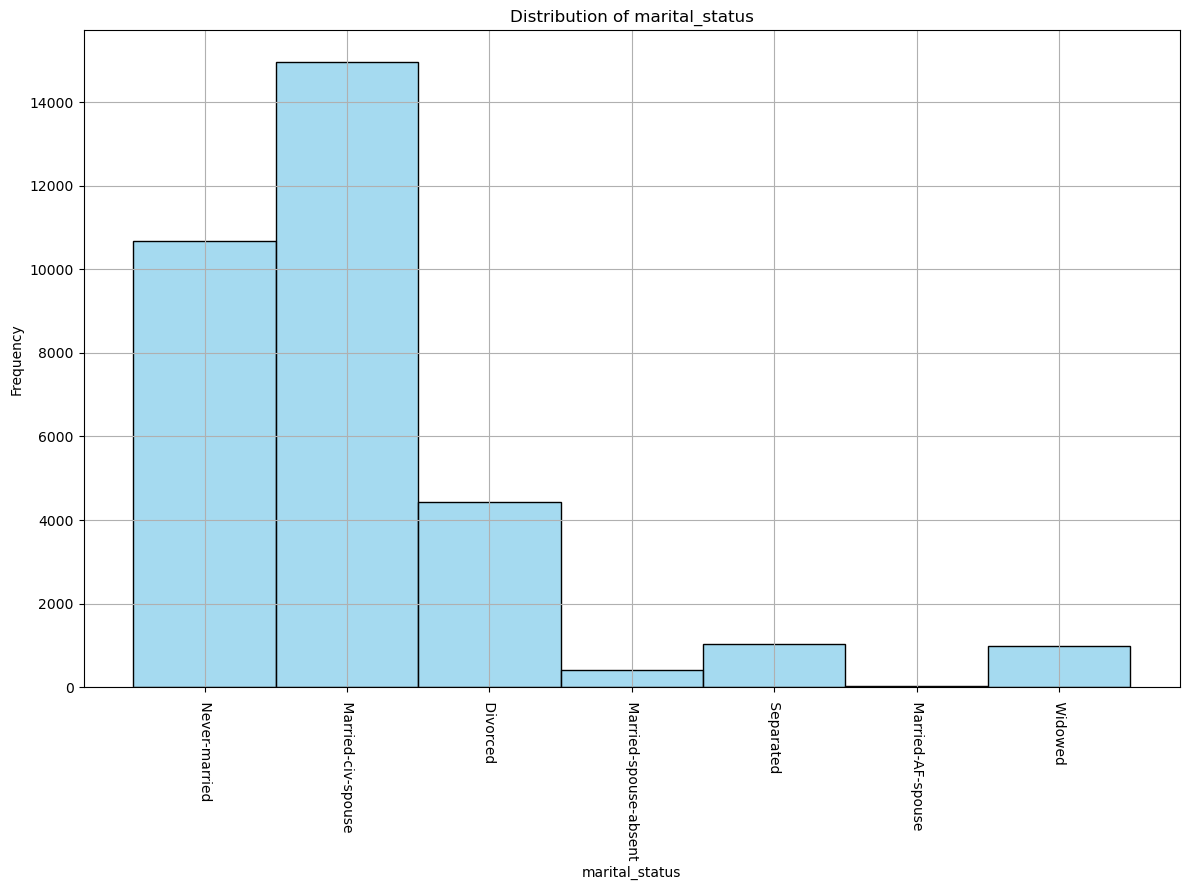

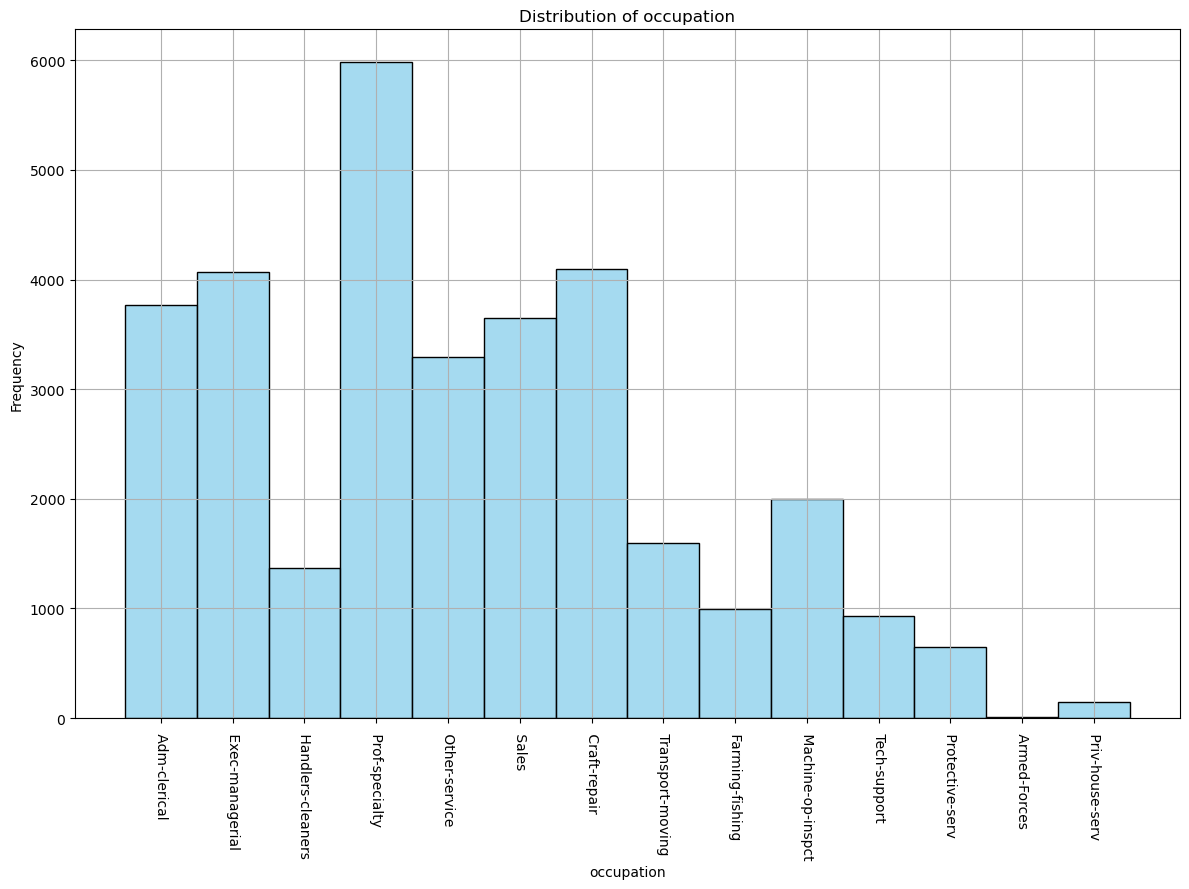

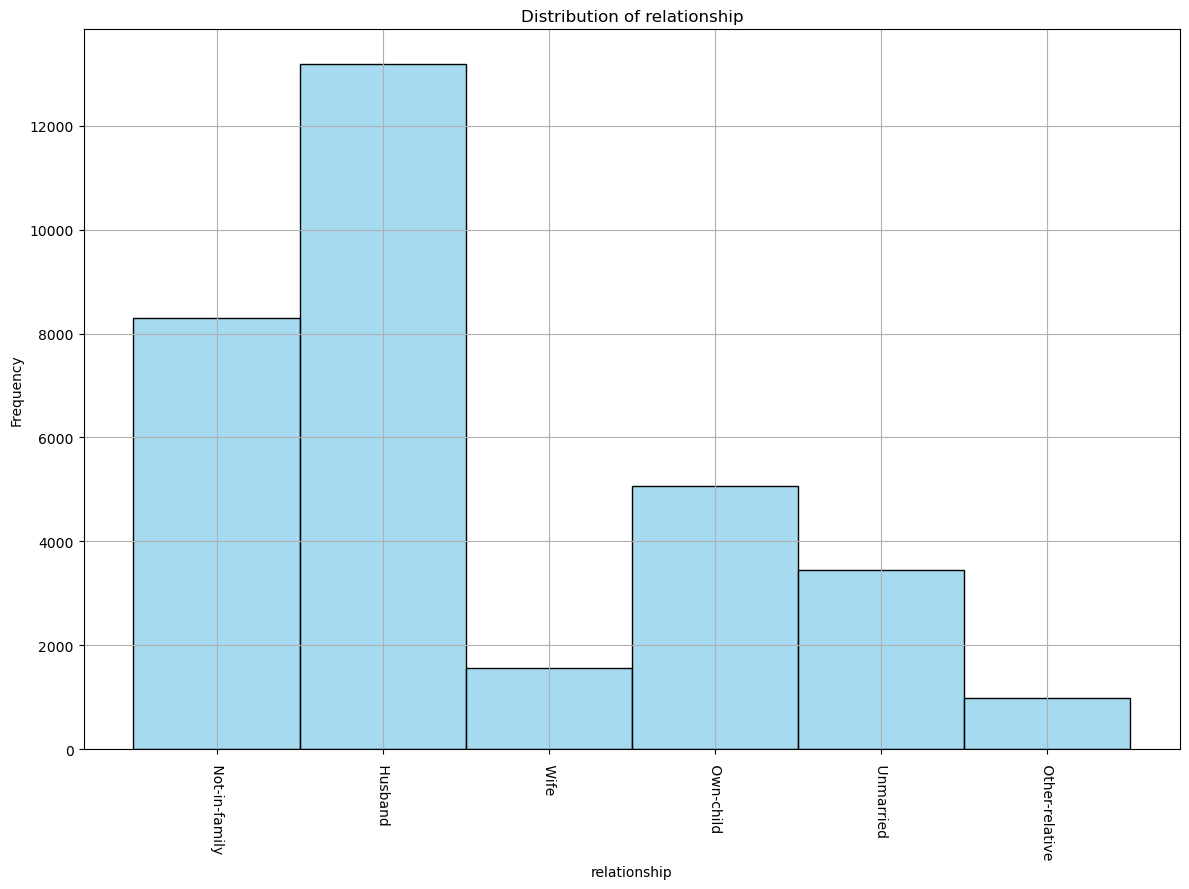

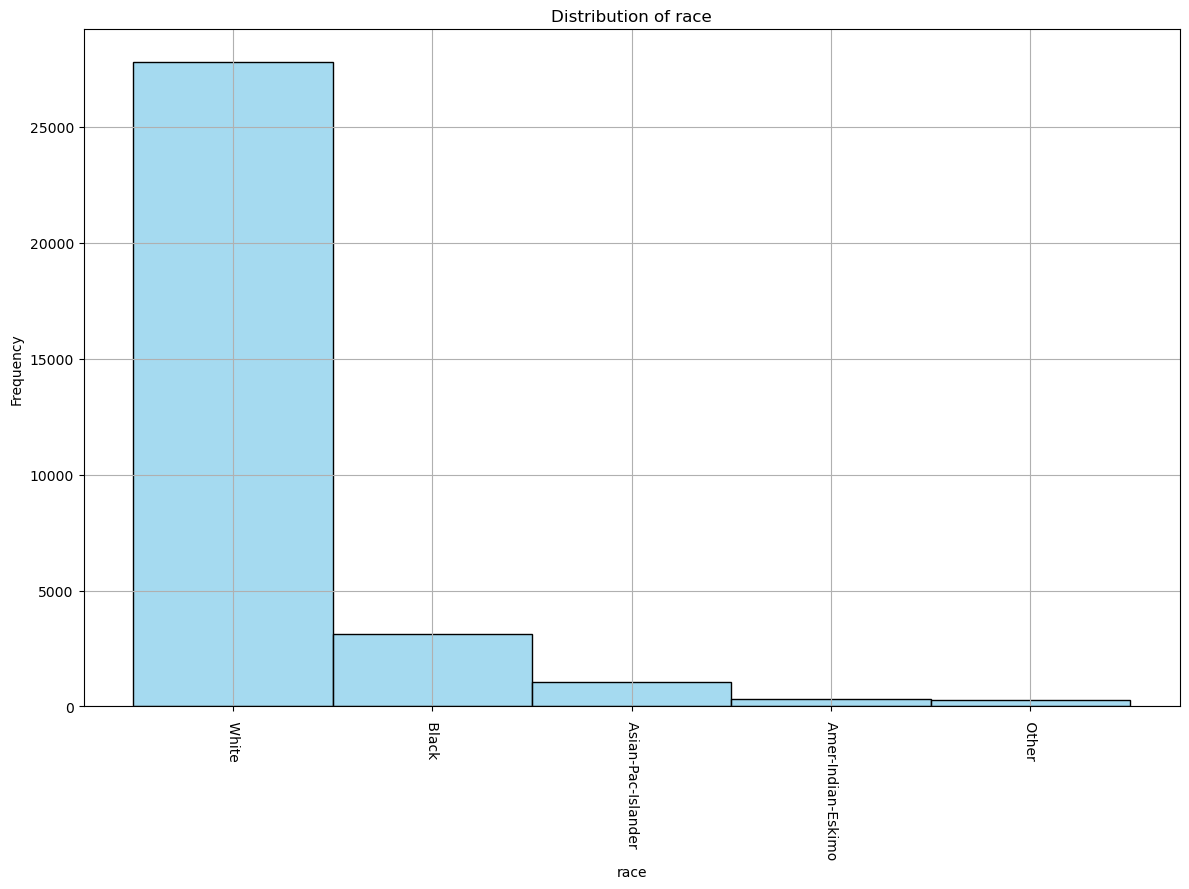

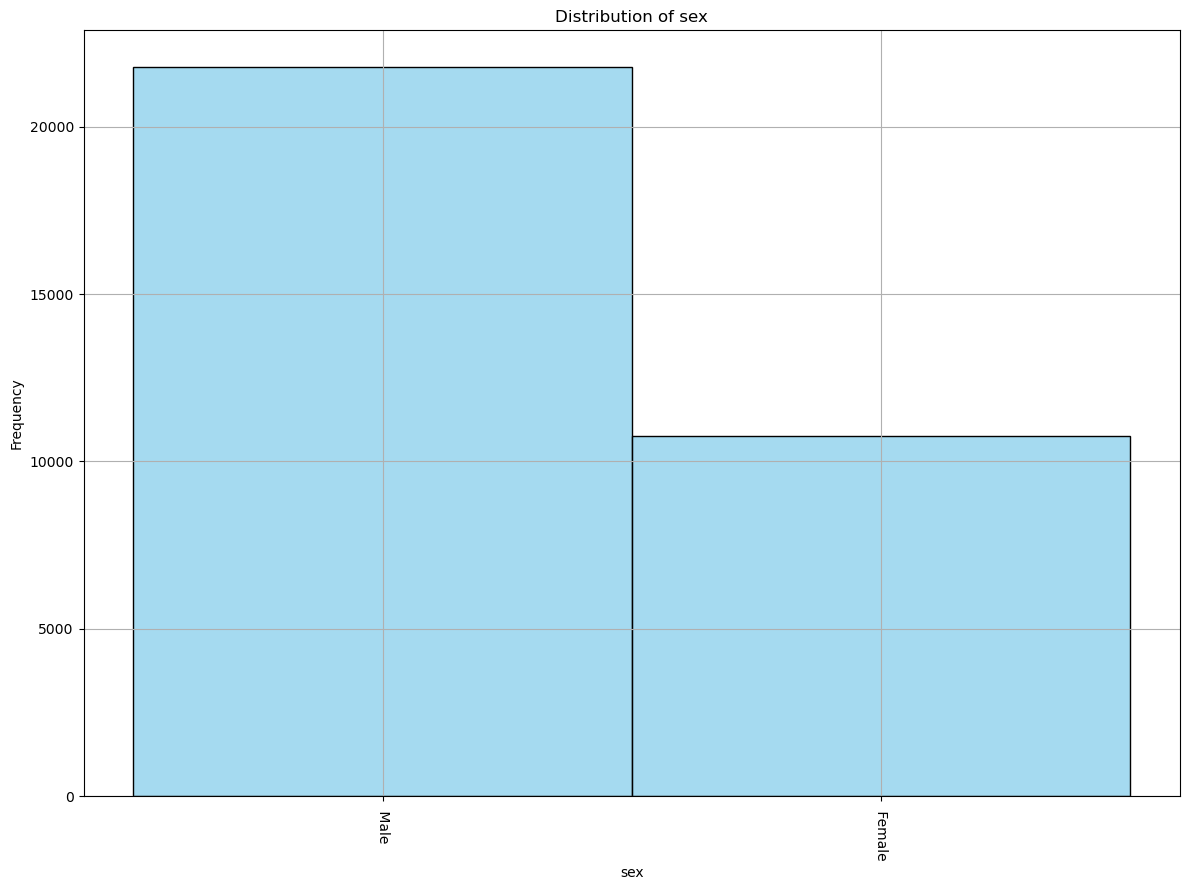

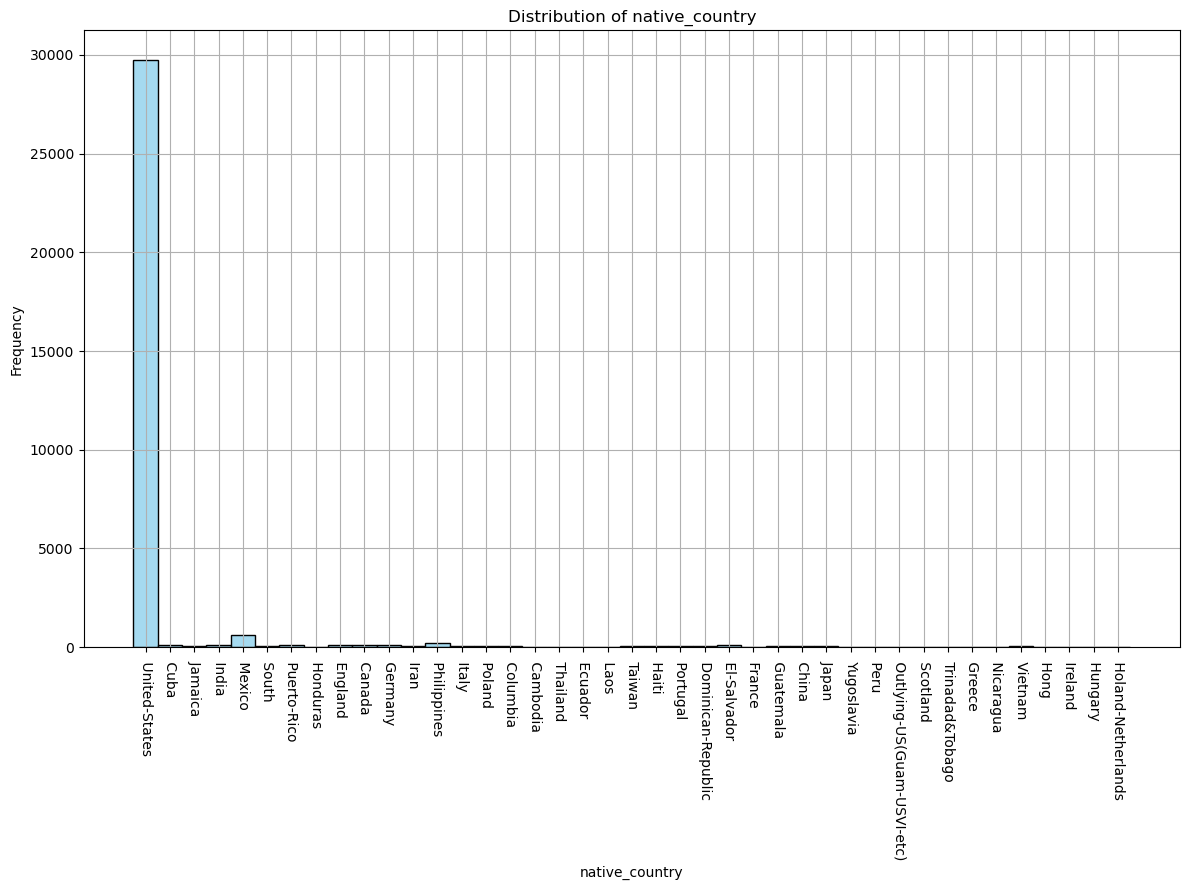

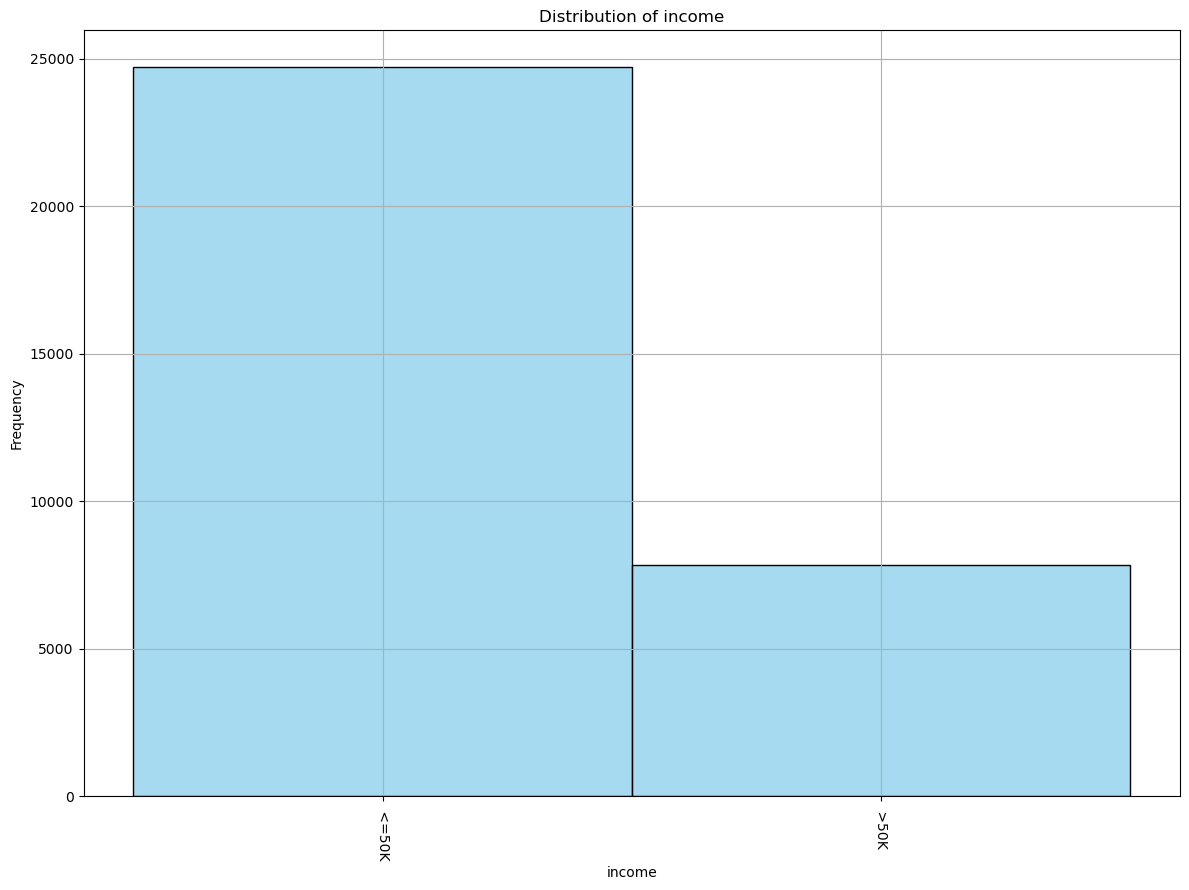

In [17]:
for col in adults.select_dtypes(include=['object']):
    plt.figure(figsize=(12, 9))
    sns.histplot(data=adults, x=col, bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.xticks(rotation=270)
    plt.tight_layout()
    plt.show()

**Scaling**

In [18]:
adults_num = adults.select_dtypes(include=['number'])
adults_num

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40
...,...,...,...,...,...,...
32556,27,257302,12,0,0,38
32557,40,154374,9,0,0,40
32558,58,151910,9,0,0,40
32559,22,201490,9,0,0,20


In [19]:
# Standard scaling
standard_scaler = StandardScaler()
#data_standard_scaled = data.copy()
adults_standard_scaled = standard_scaler.fit_transform(adults_num)

In [20]:
adults_standard_scaled

array([[ 0.03067056, -1.06361075,  1.13473876,  0.1484529 , -0.21665953,
        -0.03542945],
       [ 0.83710898, -1.008707  ,  1.13473876, -0.14592048, -0.21665953,
        -2.22215312],
       [-0.04264203,  0.2450785 , -0.42005962, -0.14592048, -0.21665953,
        -0.03542945],
       ...,
       [ 1.42360965, -0.35877741, -0.42005962, -0.14592048, -0.21665953,
        -0.03542945],
       [-1.21564337,  0.11095988, -0.42005962, -0.14592048, -0.21665953,
        -1.65522476],
       [ 0.98373415,  0.92989258, -0.42005962,  1.88842434, -0.21665953,
        -0.03542945]])

In [21]:
# Min-max scaling
minmax_scaler = MinMaxScaler()
adults_minmax_scaled = minmax_scaler.fit_transform(adults_num)
adults_minmax_scaled

array([[0.30136986, 0.0443019 , 0.8       , 0.02174022, 0.        ,
        0.39795918],
       [0.45205479, 0.0482376 , 0.8       , 0.        , 0.        ,
        0.12244898],
       [0.28767123, 0.13811345, 0.53333333, 0.        , 0.        ,
        0.39795918],
       ...,
       [0.56164384, 0.09482688, 0.53333333, 0.        , 0.        ,
        0.39795918],
       [0.06849315, 0.12849934, 0.53333333, 0.        , 0.        ,
        0.19387755],
       [0.47945205, 0.18720338, 0.53333333, 0.1502415 , 0.        ,
        0.39795918]])

**Explanation of Scaling**

1. Standard Scaling -> Ideal for algorithms like logistic regression or SVM, where features need to be on the same scale to avoid bias toward larger values.
2. Min-Max Scaling -> Suitable for neural networks or when we want to preserve the relative differences in data but constrain them to a fixed range.

# Encoding Techniques

To know which categorical columns have more or less than 5 categories we need to visualize the data

/var/folders/4c/_fs19v_93j72_br0ld44cq1m0000gn/T/ipykernel_26163/1741964122.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=adults, x=col, palette='pastel')


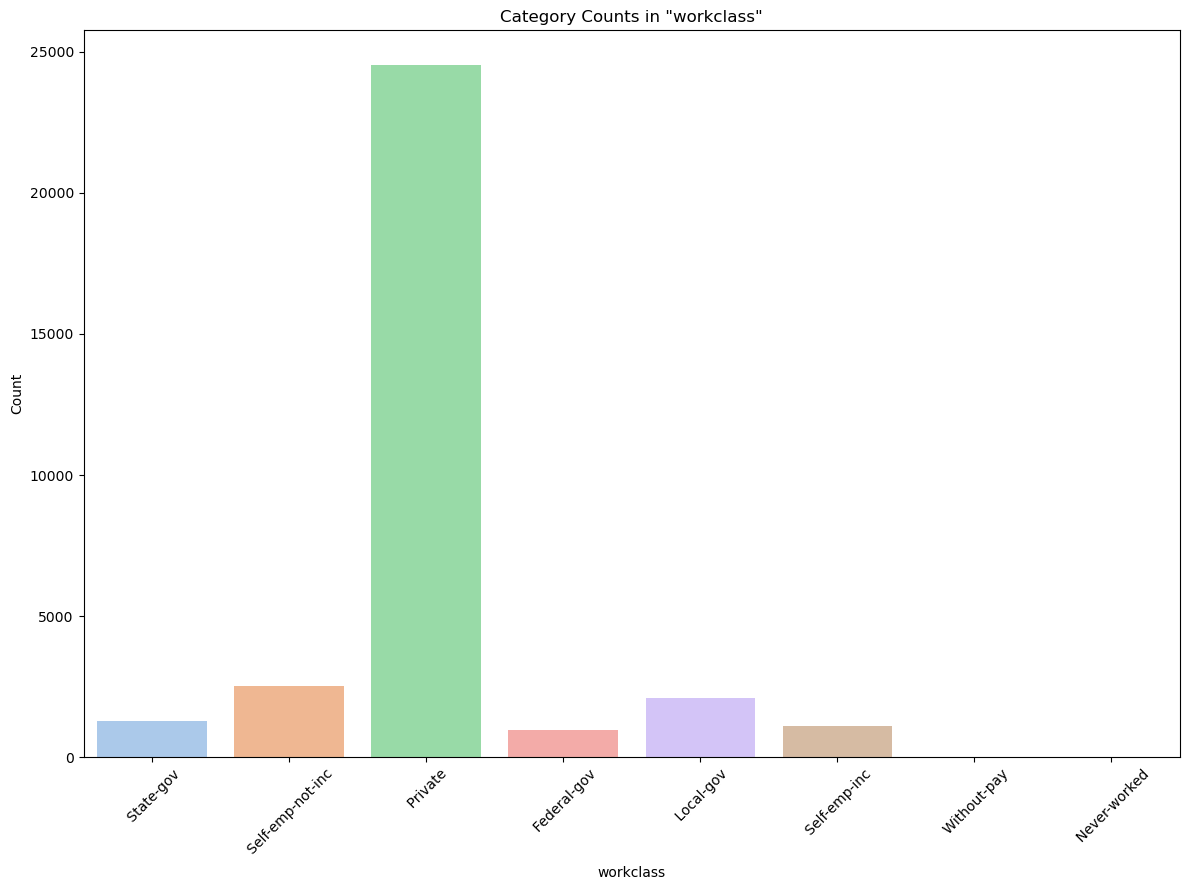

/var/folders/4c/_fs19v_93j72_br0ld44cq1m0000gn/T/ipykernel_26163/1741964122.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=adults, x=col, palette='pastel')


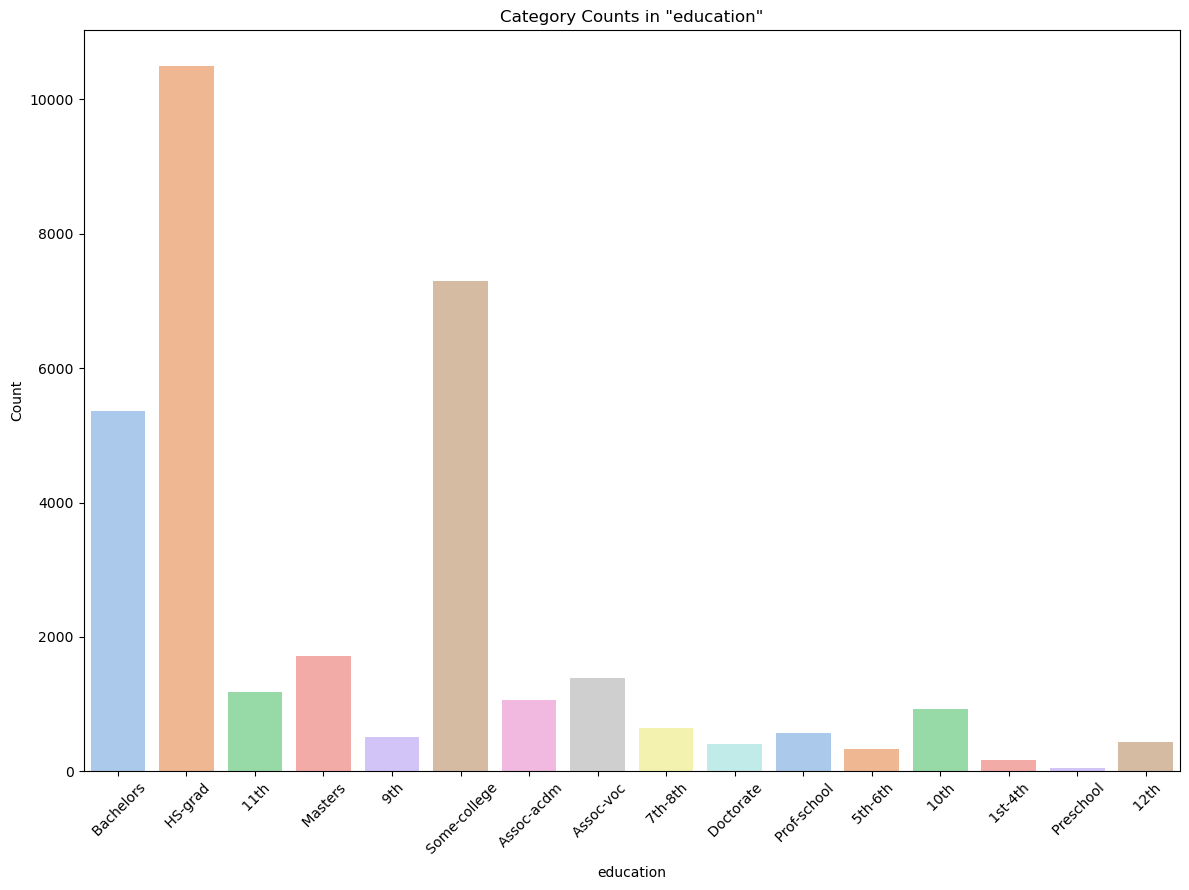

/var/folders/4c/_fs19v_93j72_br0ld44cq1m0000gn/T/ipykernel_26163/1741964122.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=adults, x=col, palette='pastel')


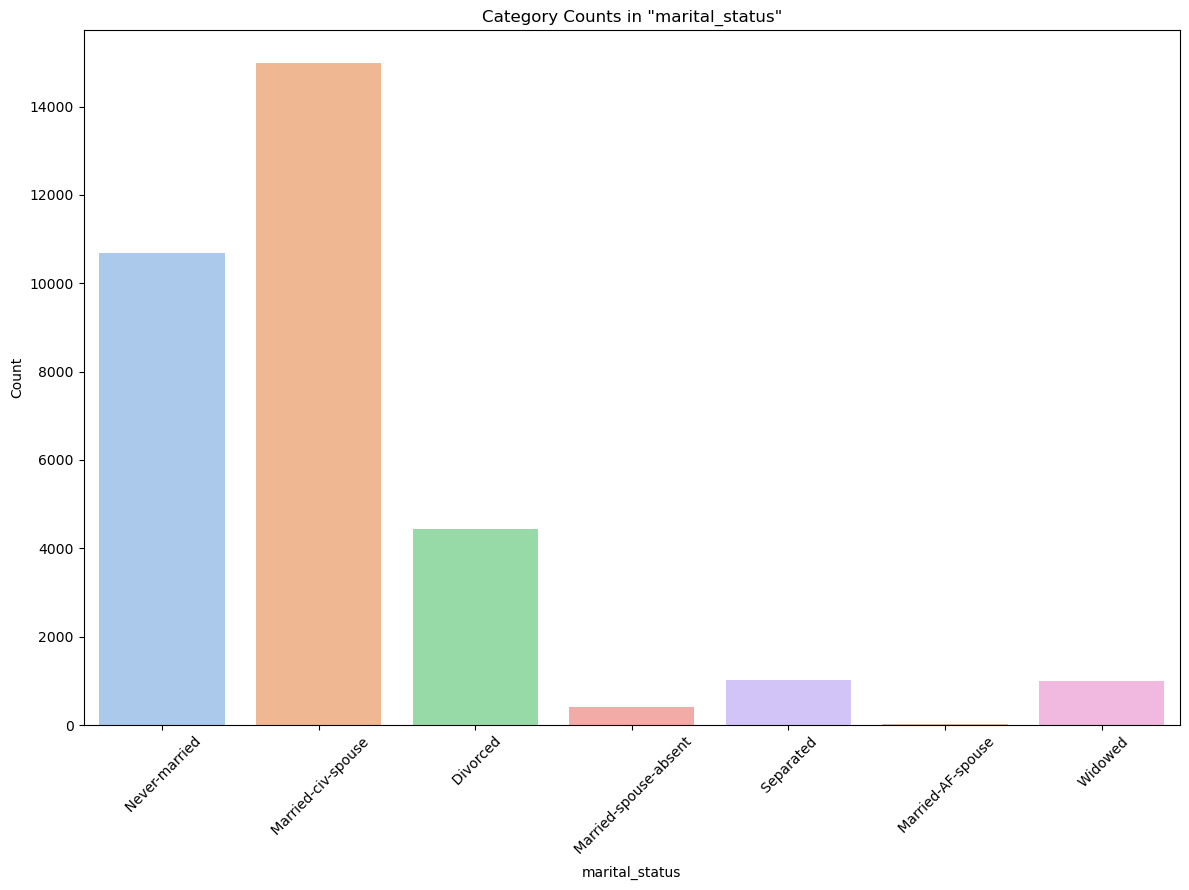

/var/folders/4c/_fs19v_93j72_br0ld44cq1m0000gn/T/ipykernel_26163/1741964122.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=adults, x=col, palette='pastel')


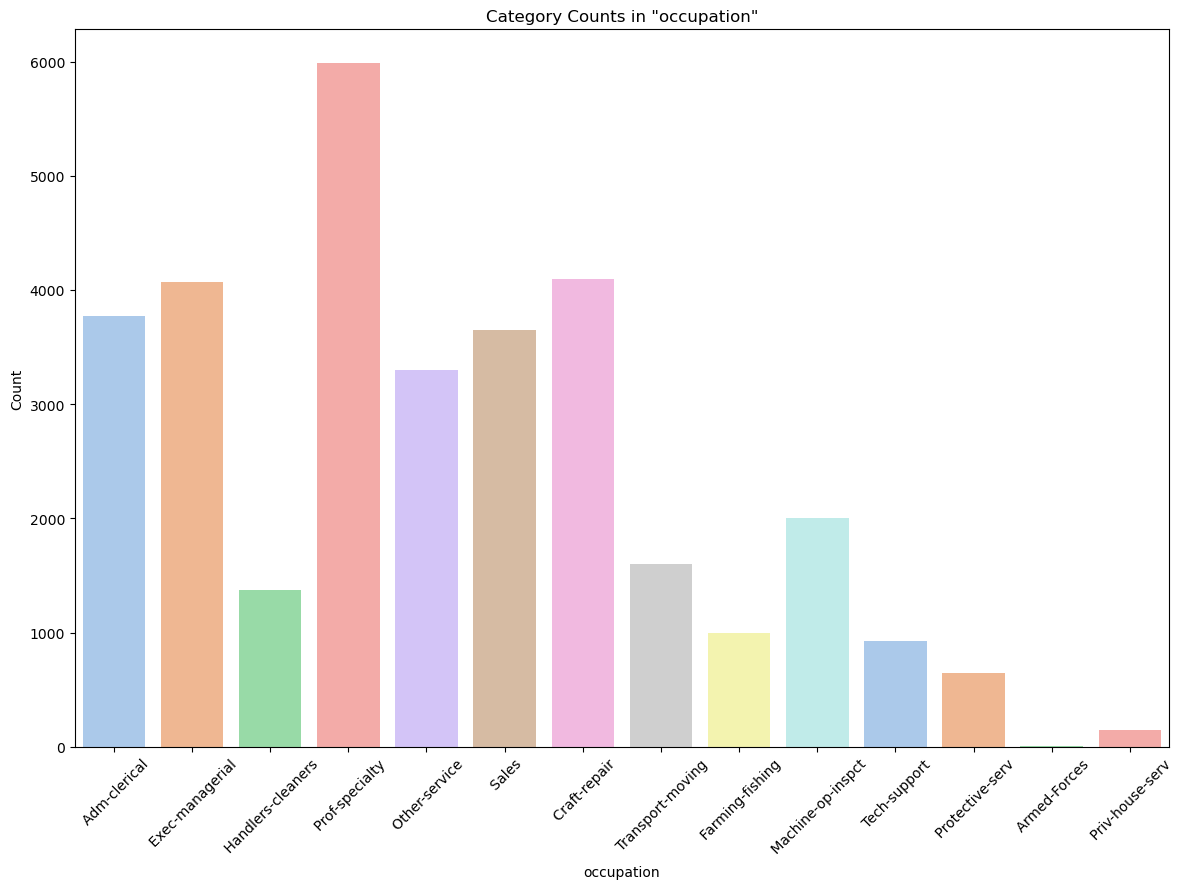

/var/folders/4c/_fs19v_93j72_br0ld44cq1m0000gn/T/ipykernel_26163/1741964122.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=adults, x=col, palette='pastel')


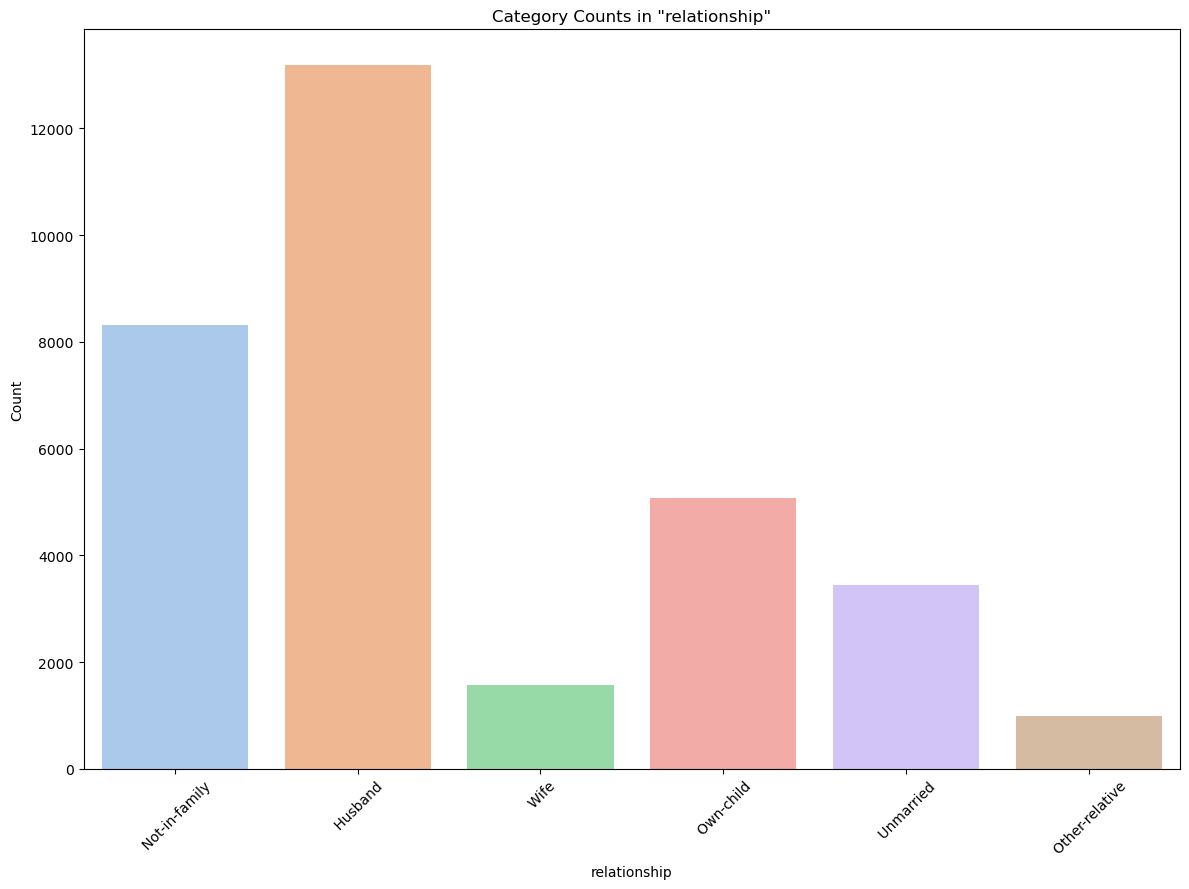

/var/folders/4c/_fs19v_93j72_br0ld44cq1m0000gn/T/ipykernel_26163/1741964122.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=adults, x=col, palette='pastel')


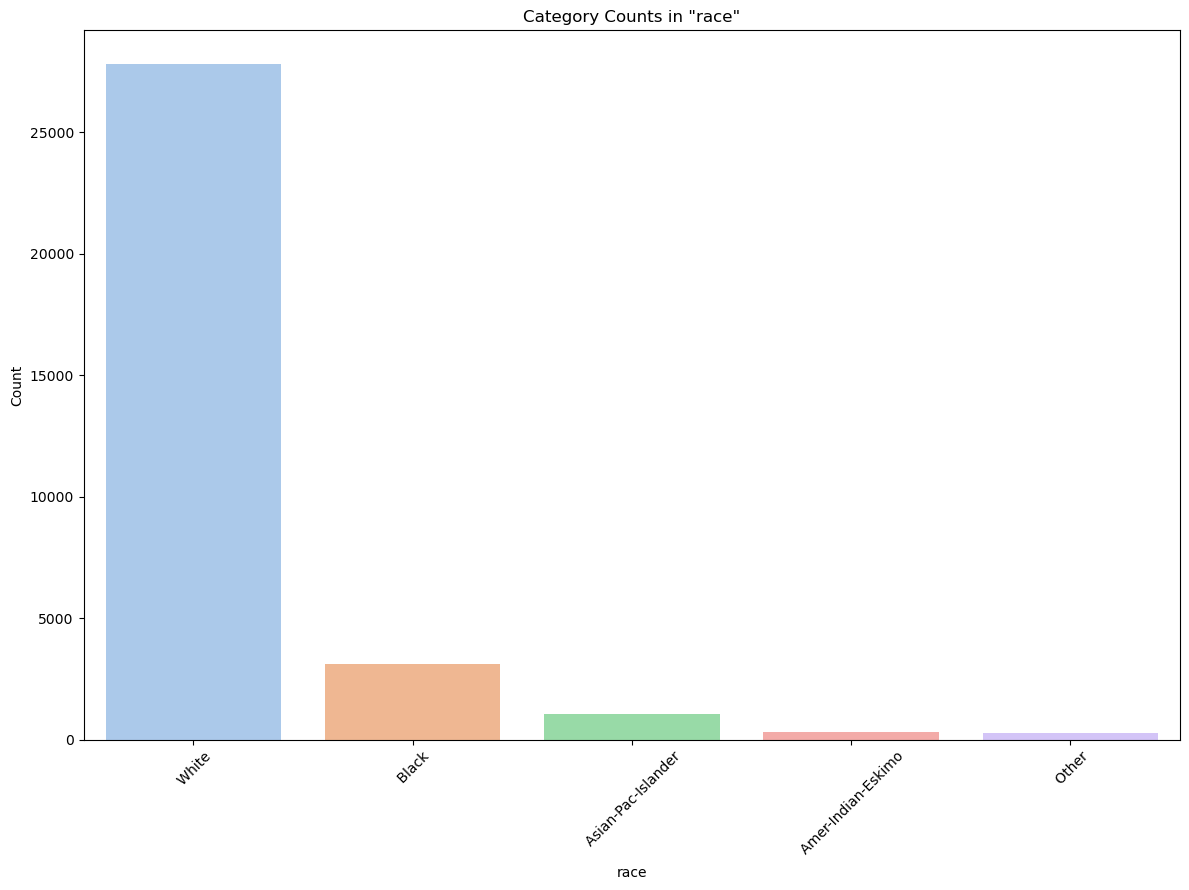

/var/folders/4c/_fs19v_93j72_br0ld44cq1m0000gn/T/ipykernel_26163/1741964122.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=adults, x=col, palette='pastel')


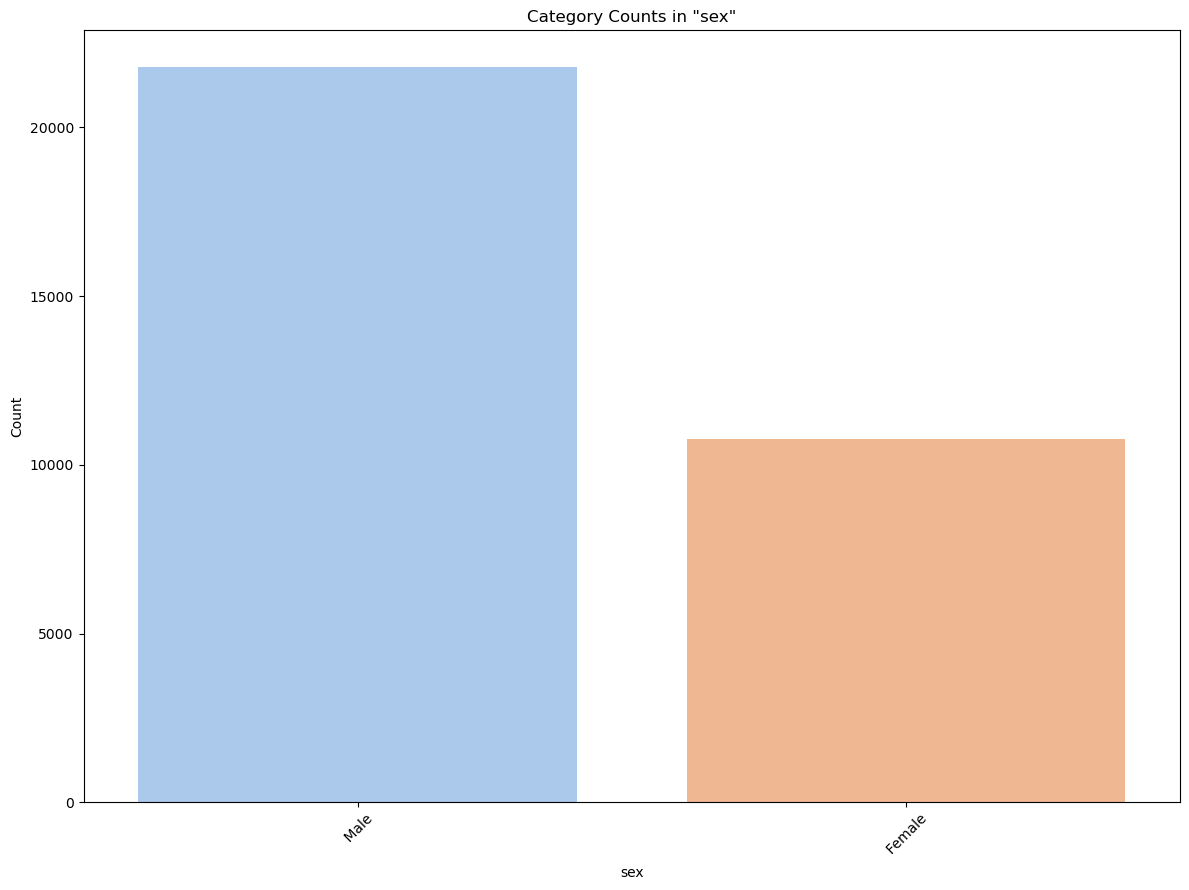

/var/folders/4c/_fs19v_93j72_br0ld44cq1m0000gn/T/ipykernel_26163/1741964122.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=adults, x=col, palette='pastel')


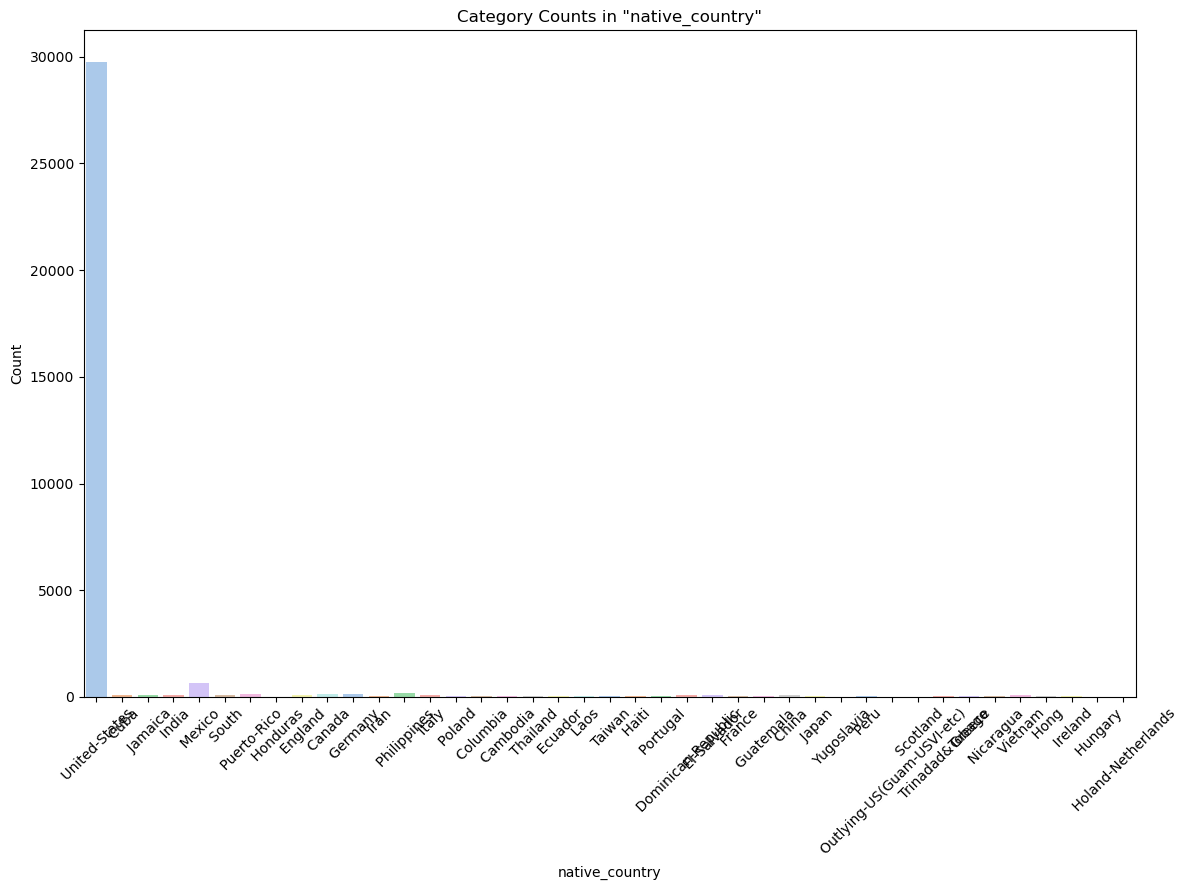

/var/folders/4c/_fs19v_93j72_br0ld44cq1m0000gn/T/ipykernel_26163/1741964122.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=adults, x=col, palette='pastel')


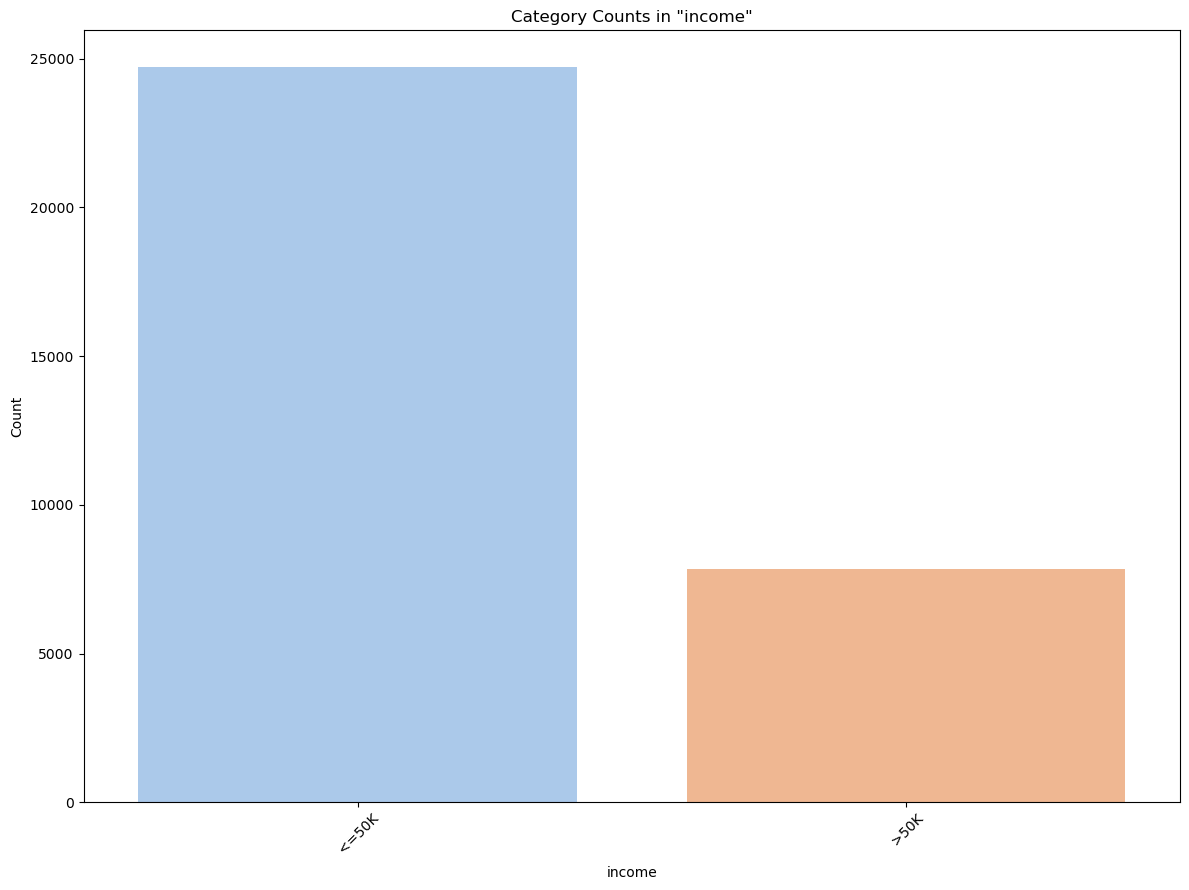

In [23]:
for col in adults.select_dtypes(include=['object']) :
    plt.figure(figsize=(12, 9))
    sns.countplot(data=adults, x=col, palette='pastel')
    plt.title(f'Category Counts in "{col}"')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

From the above visualization it is clear that we need to apply
1. One-Hot Encoding -> race, sex, income
2. Label Encoding -> workclass, education, marital_status, occupation, relationship, native_country.

In [24]:
# One-Hot encoding
adults_one_hot = pd.get_dummies(adults, columns=['race','sex','income'], drop_first=False, dtype=int)
adults_one_hot

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,...,native_country,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,income_ <=50K,income_ >50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,2174,0,...,United-States,0,0,0,0,1,0,1,1,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,0,0,...,United-States,0,0,0,0,1,0,1,1,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,0,0,...,United-States,0,0,0,0,1,0,1,1,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,0,0,...,United-States,0,0,1,0,0,0,1,1,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,0,0,...,Cuba,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,0,0,...,United-States,0,0,0,0,1,1,0,1,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,0,0,...,United-States,0,0,0,0,1,0,1,0,1
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,0,0,...,United-States,0,0,0,0,1,1,0,1,0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,0,0,...,United-States,0,0,0,0,1,0,1,1,0


In [58]:
# Label Encoding
le = LabelEncoder()
adults_label = adults.copy()
col_label = adults[['workclass', 'education', 'marital_status', 'occupation', 'race','sex','relationship', 'native_country','income']]
for col in col_label:
    adults_label[col] = le.fit_transform(adults_label[col].astype(str))
adults_label

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,6,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
2,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
3,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
4,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,3,257302,7,12,2,12,5,4,0,0,0,38,38,0
32557,40,3,154374,11,9,2,6,0,4,1,0,0,40,38,1
32558,58,3,151910,11,9,6,0,4,4,0,0,0,40,38,0
32559,22,3,201490,11,9,4,0,3,4,1,0,0,20,38,0


Explanation of Encoding Choices:

1. **One-Hot Encoding Pros:** Avoids implying ordinality, works well with algorithms like linear models. 
   **Cons:** Increases dimensionality, which can be problematic with many categories.
2. **Label Encoding Pros:** Keeps dimensionality low, suitable for tree-based models.
   **Cons:** Implies ordinality, which may mislead models if categories are non-ordinal.

# Feature Engineering

**Feature 1: Capital Net Gain**

In [59]:
adults_label['capital_net_gain'] = adults_label['capital_gain'] - adults_label['capital_loss']
adults_label

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,capital_net_gain
0,39,6,77516,9,13,4,0,1,4,1,2174,0,40,38,0,2174
1,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0,0
2,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0,0
3,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0,0
4,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,3,257302,7,12,2,12,5,4,0,0,0,38,38,0,0
32557,40,3,154374,11,9,2,6,0,4,1,0,0,40,38,1,0
32558,58,3,151910,11,9,6,0,4,4,0,0,0,40,38,0,0
32559,22,3,201490,11,9,4,0,3,4,1,0,0,20,38,0,0


**Feature 2: Education-to-Age Ratio**

In [60]:
adults_label['education_age_ratio'] = adults_label['education_num'] / adults_label['age']
adults_label

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,capital_net_gain,education_age_ratio
0,39,6,77516,9,13,4,0,1,4,1,2174,0,40,38,0,2174,0.333333
1,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0,0,0.260000
2,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0,0,0.236842
3,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0,0,0.132075
4,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0,0,0.464286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,3,257302,7,12,2,12,5,4,0,0,0,38,38,0,0,0.444444
32557,40,3,154374,11,9,2,6,0,4,1,0,0,40,38,1,0,0.225000
32558,58,3,151910,11,9,6,0,4,4,0,0,0,40,38,0,0,0.155172
32559,22,3,201490,11,9,4,0,3,4,1,0,0,20,38,0,0,0.409091


Applying log transformation to capital_gain

In [61]:
print("\nSkewness of capital_gain:", adults_label['capital_gain'].skew())
adults_label['capital_gain_log'] = np.log1p(adults_label['capital_gain'])


Skewness of capital_gain: 11.953847687699799


Visualization of capital_gain

Text(0, 0.5, 'Frequency')

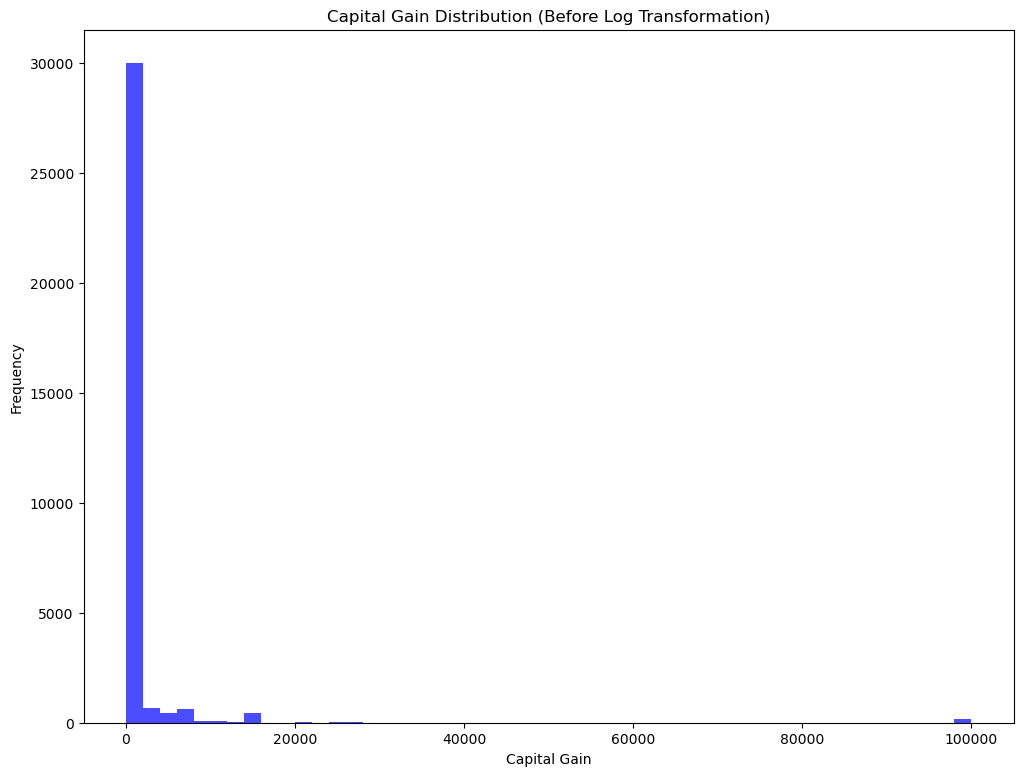

In [50]:
plt.figure(figsize=(12, 9))
plt.hist(adults_label['capital_gain'], bins=50, color='blue', alpha=0.7)
plt.title('Capital Gain Distribution (Before Log Transformation)')
plt.xlabel('Capital Gain')
plt.ylabel('Frequency')

Visualization of capital_gain_log which is logarithmic trasformation

Text(0, 0.5, 'Frequency')

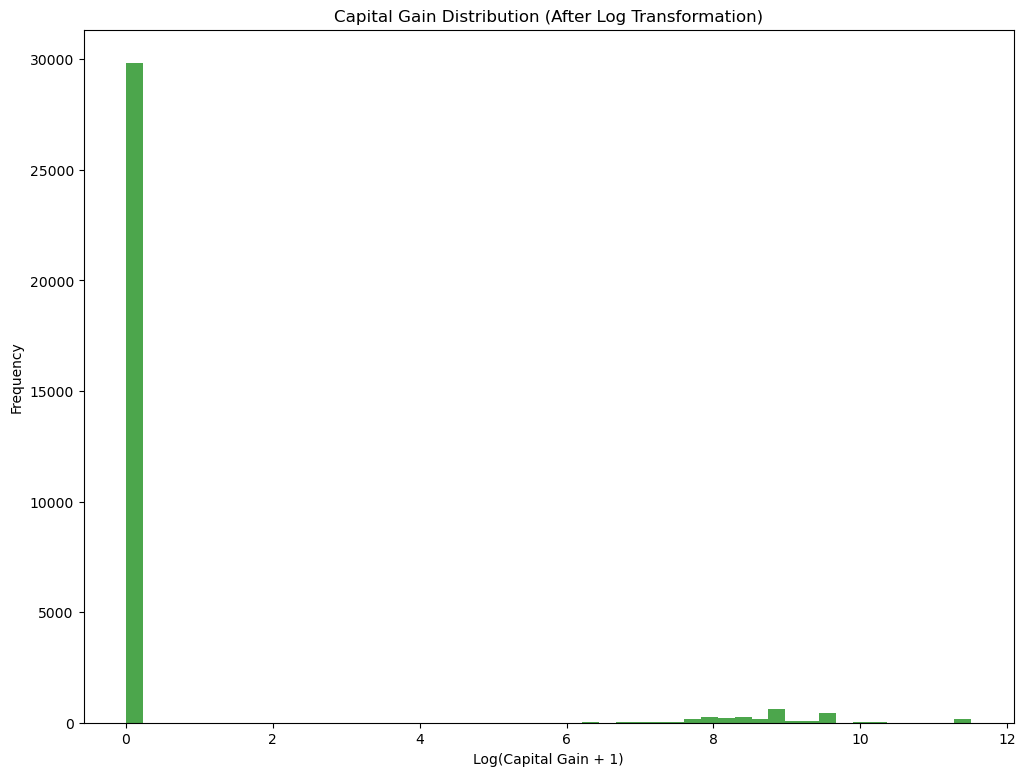

In [34]:
plt.figure(figsize=(12, 9))
plt.hist(adults_label['capital_gain_log'], bins=50, color='green', alpha=0.7)
plt.title('Capital Gain Distribution (After Log Transformation)')
plt.xlabel('Log(Capital Gain + 1)')
plt.ylabel('Frequency')

After doing all the pre & post processing we have generated 2 reports
1. adults_one_hot
2. adults_label

now Lets combine these reports and delete unlabeled, unscaled columns

In [51]:
adults_label

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,capital_net_gain,education_age_ratio,capital_gain_log
0,39,6,77516,9,13,4,0,1,White,Male,2174,0,40,38,0,2174,0.333333,7.684784
1,50,5,83311,9,13,2,3,0,White,Male,0,0,13,38,0,0,0.260000,0.000000
2,38,3,215646,11,9,0,5,1,White,Male,0,0,40,38,0,0,0.236842,0.000000
3,53,3,234721,1,7,2,5,0,Black,Male,0,0,40,38,0,0,0.132075,0.000000
4,28,3,338409,9,13,2,9,5,Black,Female,0,0,40,4,0,0,0.464286,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,3,257302,7,12,2,12,5,White,Female,0,0,38,38,0,0,0.444444,0.000000
32557,40,3,154374,11,9,2,6,0,White,Male,0,0,40,38,1,0,0.225000,0.000000
32558,58,3,151910,11,9,6,0,4,White,Female,0,0,40,38,0,0,0.155172,0.000000
32559,22,3,201490,11,9,4,0,3,White,Male,0,0,20,38,0,0,0.409091,0.000000


In [41]:
adults

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


Defining x & y

In [62]:
y = adults_label['income']
X = adults_label.drop('income', axis=1)
y

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: income, Length: 32561, dtype: int64

In [63]:
X

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,capital_net_gain,education_age_ratio,capital_gain_log
0,39,6,77516,9,13,4,0,1,4,1,2174,0,40,38,2174,0.333333,7.684784
1,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0,0.260000,0.000000
2,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0,0.236842,0.000000
3,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0,0.132075,0.000000
4,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0,0.464286,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,3,257302,7,12,2,12,5,4,0,0,0,38,38,0,0.444444,0.000000
32557,40,3,154374,11,9,2,6,0,4,1,0,0,40,38,0,0.225000,0.000000
32558,58,3,151910,11,9,6,0,4,4,0,0,0,40,38,0,0.155172,0.000000
32559,22,3,201490,11,9,4,0,3,4,1,0,0,20,38,0,0.409091,0.000000


**Scale numerical features for chi2**

Here we are opting Label Encoded data because we need this data frame on Feature extraction

In [64]:
numerical_cols = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 
                  'hours_per_week', 'capital_net_gain', 'capital_gain_log', 'education_age_ratio']
X[numerical_cols] = MinMaxScaler().fit_transform(X[numerical_cols])

Univariate Feature Selection with chi2

In [65]:
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, y)
np.set_printoptions(precision=3)
chi2_scores = pd.Series(fit.scores_, index=X.columns)
print("\nChi-squared Scores:\n", chi2_scores.sort_values(ascending=False))
chi2_selected = X.columns[fit.get_support()].tolist()
print("\nSelected Features (Univariate, Top 4):\n", chi2_selected)


Chi-squared Scores:
 relationship           3659.143125
capital_gain_log       1943.698756
marital_status         1123.469818
capital_gain            821.932891
sex                     502.439419
capital_loss            315.001352
education               297.942270
age                     210.621483
education_num           177.725050
capital_net_gain        147.296969
occupation              100.356439
hours_per_week           67.761518
race                     33.031305
native_country           17.434189
education_age_ratio      12.521730
fnlwgt                    0.124281
workclass                 0.093544
dtype: float64

Selected Features (Univariate, Top 4):
 ['marital_status', 'relationship', 'capital_gain', 'capital_gain_log']


Recursive Feature Elimination (RFE)

In [68]:
model = LogisticRegression(max_iter=400)
rfe = RFE(model, n_features_to_select=3)
fit_rfe = rfe.fit(X, y)
rfe_ranking = pd.Series(fit_rfe.ranking_, index=X.columns)
print("\nNumber of Features (RFE):", fit_rfe.n_features_)
print("\nSelected Features (RFE, Top 3):\n", X.columns[fit_rfe.support_].tolist())
print("\nFeature Ranking (RFE):\n", rfe_ranking.sort_values())

/opt/anaconda3/envs/data_science_env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/data_science_env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/l


Number of Features (RFE): 3

Selected Features (RFE, Top 3):
 ['education_num', 'capital_gain', 'capital_net_gain']

Feature Ranking (RFE):
 capital_net_gain        1
education_num           1
capital_gain            1
education_age_ratio     2
hours_per_week          3
capital_loss            4
age                     5
sex                     6
capital_gain_log        7
fnlwgt                  8
marital_status          9
race                   10
relationship           11
workclass              12
education              13
occupation             14
native_country         15
dtype: int64


Feature Importance with Decision Tree

In [69]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X, y)
dt_importance = pd.Series(dt_model.feature_importances_, index=X.columns)
print("\nDecision Tree Feature Importance (Top 5):\n", dt_importance.sort_values(ascending=False).head())


Decision Tree Feature Importance (Top 5):
 relationship      0.199413
fnlwgt            0.197407
education_num     0.109285
age               0.079428
hours_per_week    0.067075
dtype: float64


Decide Final Features

In [70]:
chi2_set = set(chi2_selected)
rfe_set = set(X.columns[fit_rfe.support_])
dt_top = set(dt_importance.nlargest(5).index)
final_features = list(chi2_set.intersection(rfe_set) | chi2_set.intersection(dt_top) | rfe_set.intersection(dt_top))
print("\nFinal Selected Features (Appearing in at least 2 methods):\n", final_features)


Final Selected Features (Appearing in at least 2 methods):
 ['education_num', 'relationship', 'capital_gain']


In [72]:
print("\nData with New Features (First 5 Rows):\n", 
      adults_label[['capital_net_gain', 'education_age_ratio', 'capital_gain_log']].head())


Data with New Features (First 5 Rows):
    capital_net_gain  education_age_ratio  capital_gain_log
0              2174             0.333333          7.684784
1                 0             0.260000          0.000000
2                 0             0.236842          0.000000
3                 0             0.132075          0.000000
4                 0             0.464286          0.000000


# Feature Selection

Isolation Forest for Outlier Detection

In [73]:
numerical_cols = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 
                  'hours_per_week', 'capital_net_gain', 'capital_gain_log', 'education_age_ratio']
iso_forest = IsolationForest(contamination=0.1, random_state=42)
outliers = iso_forest.fit_predict(adults_label[numerical_cols])
adults_no_outliers = adults_label[outliers == 1]
print("\nOriginal Dataset Shape:", adults_label.shape)
print("Dataset Shape After Outlier Removal:", adults_no_outliers.shape)


Original Dataset Shape: (32561, 18)
Dataset Shape After Outlier Removal: (29305, 18)


PPS Analysis

In [75]:
pps_matrix = pps.matrix(adults_no_outliers)
pps_pivot = pps_matrix.pivot(columns='y', index='x', values='ppscore')
print("\nPPS Matrix (Top Relationships):\n", pps_pivot[['income']].sort_values(by='income', ascending=False).head())
print("\nKey PPS Findings:")
for index, row in pps_matrix.sort_values(by='ppscore', ascending=False).head(5).iterrows():
    print(f"{row['x']} predicts {row['y']} with PPS = {row['ppscore']:.3f}")


PPS Matrix (Top Relationships):
 y             income
x                   
income           1.0
age              0.0
capital_gain     0.0
sex              0.0
relationship     0.0

Key PPS Findings:
age predicts age with PPS = 1.000
race predicts race with PPS = 1.000
education predicts education with PPS = 1.000
education predicts education_num with PPS = 1.000
education_num predicts education with PPS = 1.000


Correlation matrix


Correlation Matrix (Top Correlations):
 age                  age                 1.000000
capital_gain_log     capital_gain        0.938192
capital_gain         capital_net_gain    0.889446
capital_gain_log     capital_net_gain    0.835785
education_age_ratio  age                 0.786083
dtype: float64


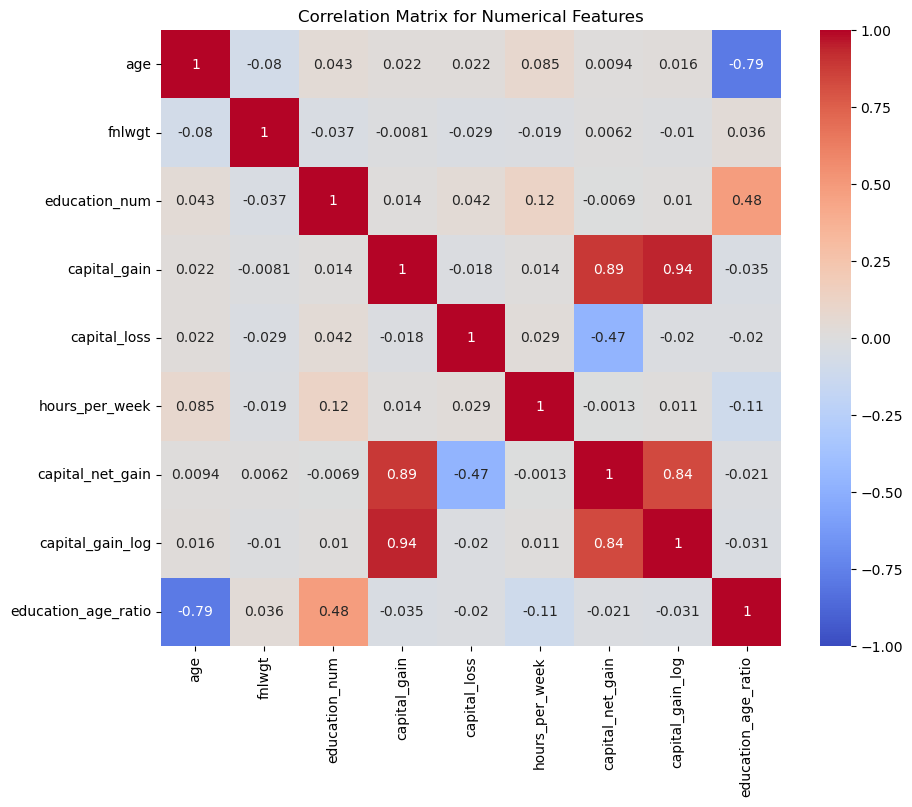

In [76]:
corr_matrix = adults_no_outliers[numerical_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix for Numerical Features')
plt.savefig('correlation_matrix.png')
print("\nCorrelation Matrix (Top Correlations):\n", corr_matrix.abs().unstack().sort_values(ascending=False).drop_duplicates().head())